# Import Libraries

In [124]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from dash import dash
import dash_core_components as dcc
import dash_html_components as html

from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score



# Load The Data

In [2]:
DF_Train=pd.read_csv('Desktop/titanic/train.csv')

## Exploration the Data

In [3]:
DF_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
DF_Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
DF_Train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
DF_Train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
DF_Train.duplicated().sum()

0

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

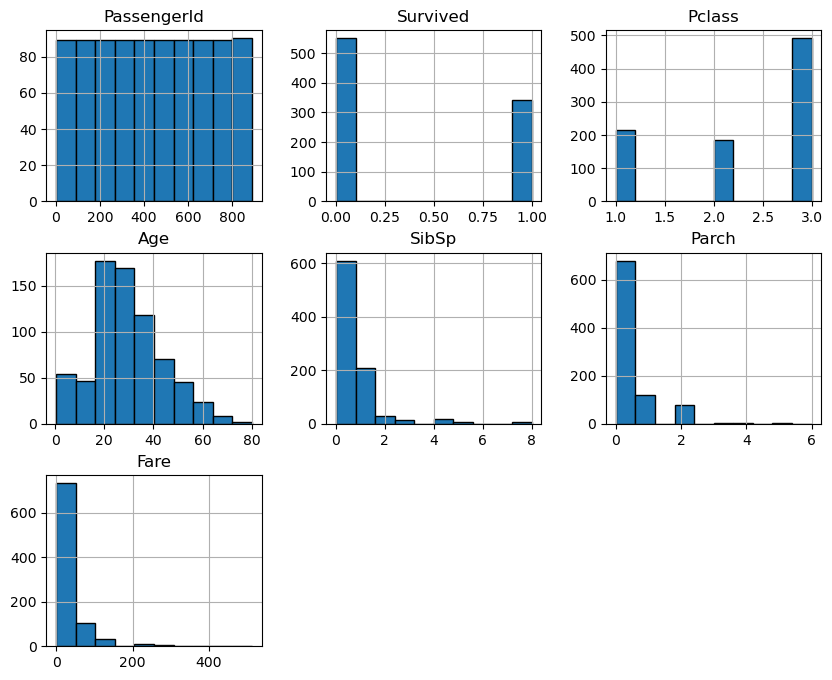

In [10]:
DF_Train.hist( edgecolor='black',figsize=(10,8))

PassengerId       Axes(0.125,0.653529;0.227941x0.226471)
Survived       Axes(0.398529,0.653529;0.227941x0.226471)
Pclass         Axes(0.672059,0.653529;0.227941x0.226471)
Age               Axes(0.125,0.381765;0.227941x0.226471)
SibSp          Axes(0.398529,0.381765;0.227941x0.226471)
Parch          Axes(0.672059,0.381765;0.227941x0.226471)
Fare                  Axes(0.125,0.11;0.227941x0.226471)
dtype: object

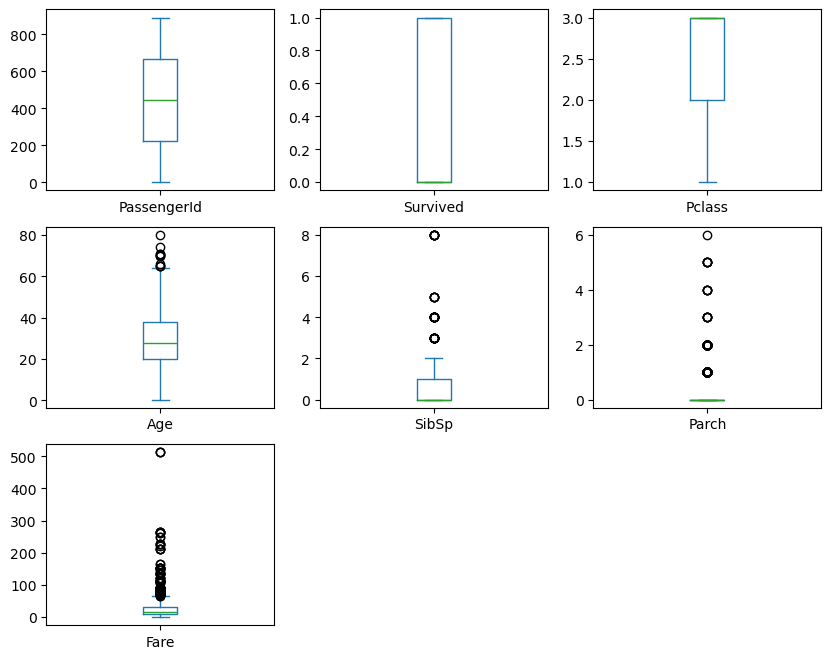

In [11]:
DF_Train.plot(kind='box',
             subplots=True,
              layout=(3,3),
              figsize=(10,8)
             )

In [14]:
DF_Train['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

## Grouping data to Cleaing The Data For EDA

In [15]:
DF_Train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
DF_Train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [33]:
G_S=DF_Train.groupby('Embarked').get_group('S')
G_C=DF_Train.groupby('Embarked').get_group('C')
G_Q=DF_Train.groupby('Embarked').get_group('Q')

In [34]:
round(G_S['Age'].mean(),0),round(G_C['Age'].mean(),0),round(G_Q['Age'].mean(),0)

(29.0, 31.0, 28.0)

In [39]:
G_S['Age'].fillna(round(G_S['Age'].mean(),0),inplace=True);
G_C['Age'].fillna(round(G_C['Age'].mean(),0),inplace=True);
G_Q['Age'].fillna(round(G_Q['Age'].mean(),0),inplace=True);


C:\Users\Empapy\AppData\Local\Temp\ipykernel_11984\3747040998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  G_S['Age'].fillna(round(G_S['Age'].mean(),0),inplace=True);
C:\Users\Empapy\AppData\Local\Temp\ipykernel_11984\3747040998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  G_C['Age'].fillna(round(G_C['Age'].mean(),0),inplace=True);
C:\Users\Empapy\AppData\Local\Temp\ipykernel_11984\3747040998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [76]:
DF_Train = pd.concat([G_S,G_C,G_Q], ignore_index=True)
DF_Train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S


In [77]:
DF_Train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

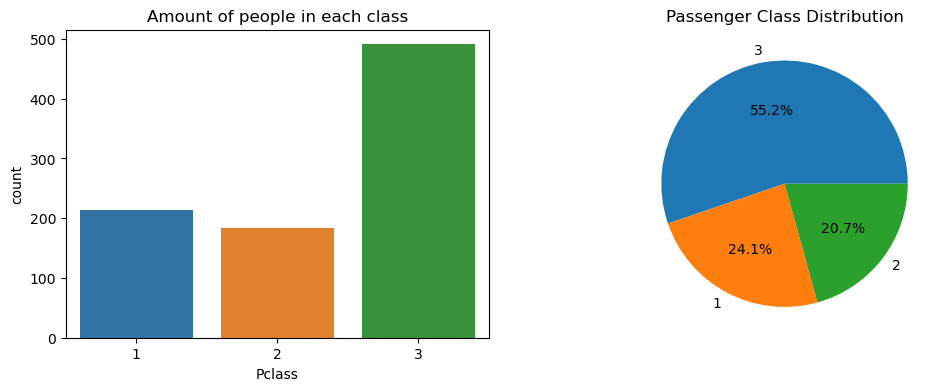

In [92]:
fig = plt.figure(figsize=(12,4))
gs=fig.add_gridspec(1,2)
ax1=fig.add_subplot(gs[0,0])
sns.countplot(x=DF_Train['Pclass'])
plt.title('Amount of people in each class')
ax2=fig.add_subplot(gs[0,1])
pclass_counts = DF_Train['Pclass'].value_counts()
plt.pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%')
plt.title('Passenger Class Distribution')
plt.show()

In [98]:
Count=DF_Train['Embarked'].value_counts()

Text(0.5, 0, 'Classes')

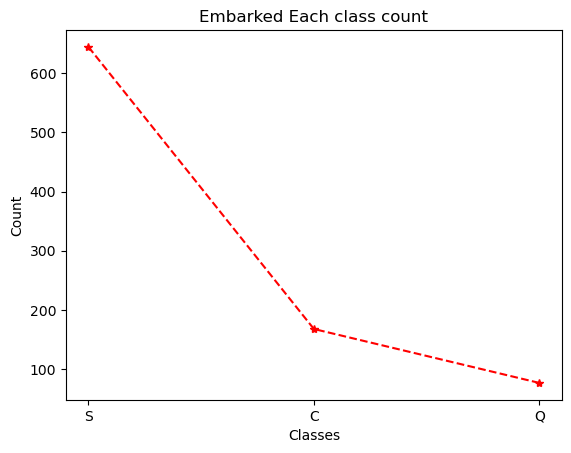

In [105]:
plt.plot(Count,'r--',marker='*')
plt.title('Embarked Each class count')
plt.ylabel('Count')
plt.xlabel('Classes')

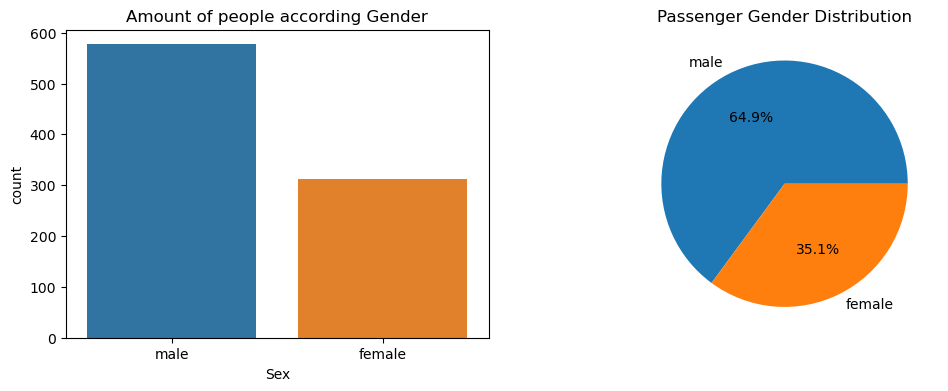

In [107]:
fig = plt.figure(figsize=(12,4))
gs=fig.add_gridspec(1,2)
ax1=fig.add_subplot(gs[0,0])
sns.countplot(x=DF_Train['Sex'])
plt.title('Amount of people according Gender')
ax2=fig.add_subplot(gs[0,1])
pclass_counts = DF_Train['Sex'].value_counts()
plt.pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%')
plt.title('Passenger Gender Distribution')
plt.show()

# Feature Selection

In [108]:
DF_Train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
DF_Train.drop(columns=['Ticket','Fare','Cabin'],inplace=True)

In [112]:
DF_Train.drop(columns=['Name'],inplace=True)

In [113]:
DF_Train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,3,1,3,female,26.0,0,0,S
2,4,1,1,female,35.0,1,0,S


# Data Preprocessing

In [114]:
Label=LabelEncoder()
Label.fit(DF_Train['Sex'])

LabelEncoder()

In [115]:
DF_Train['Sex']=Label.transform(DF_Train['Sex'])

In [117]:
Label=LabelEncoder()
Label.fit(DF_Train['Embarked'])
DF_Train['Embarked']=Label.transform(DF_Train['Embarked'])

In [121]:
MM=MinMaxScaler()
MM.fit(np.reshape(DF_Train['Age'],[-1,1]))


MinMaxScaler()

In [122]:
DF_Train['Age']=MM.transform(np.reshape(DF_Train['Age'],[-1,1]))

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,0.271174,1,0,2
1,3,1,3,0,0.321438,0,0,2
2,4,1,1,0,0.434531,1,0,2


In [125]:
X=np.array(DF_Train.drop(columns=['Survived']))
y=np.array(DF_Train['Survived'])

In [140]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Logistic Regression Model

In [141]:
LOG_MOD=LogisticRegression()
LOG_MOD.fit(X_train,y_train)

C:\Users\Empapy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [145]:
LOG_Accuracy=accuracy_score(y_test,LOG_MOD.predict(X_test))

In [146]:
LOG_Accuracy

0.8202247191011236

# Support Vector Classifier

In [153]:
svc=SVC(kernel='sigmoid')
svc.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [154]:
SVC_Accuracy=accuracy_score(y_test,LOG_MOD.predict(X_test))
SVC_Accuracy

0.8202247191011236

# K-Nearest Neighbors Classifier

In [163]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [164]:
KNN_Accuracy=accuracy_score(y_test,knn.predict(X_test))
KNN_Accuracy

0.5561797752808989

# Decision Tree

In [185]:
DT=DecisionTreeClassifier(max_depth=3)
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [186]:
DT_Accuracy=accuracy_score(y_test,DT.predict(X_test))
DT_Accuracy

0.8089887640449438

# Random Forest Classifier

In [248]:
RFC=RandomForestClassifier(n_estimators=200)
RFC.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [249]:
RFC_Accuracy=accuracy_score(y_test,RFC.predict(X_test))
RFC_Accuracy

0.8089887640449438

# Gradient Boosting Classifier

In [262]:
GBC=GradientBoostingClassifier(learning_rate=0.2)
GBC.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.2)

In [263]:
GBC_Accuracy=accuracy_score(y_test,GBC.predict(X_test))
GBC_Accuracy

0.8202247191011236

# AdaBoost Classifier

In [272]:
ADC=AdaBoostClassifier()
ADC.fit(X_train,y_train)

AdaBoostClassifier()

In [273]:
ADC_Accuracy=accuracy_score(y_test,ADC.predict(X_test))
ADC_Accuracy

0.8258426966292135

# gaussionNB

In [274]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB()

In [275]:
GNB_Accuracy=accuracy_score(y_test,GNB.predict(X_test))
GNB_Accuracy

0.7865168539325843

# Multi-layer Perceptron Classifier

In [287]:
MLP=MLPClassifier(hidden_layer_sizes=(200))
MLP.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=200)

In [288]:
MLP_Accuracy=accuracy_score(y_test,GNB.predict(X_test))
MLP_Accuracy

0.7865168539325843